Simulator...
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
MAIN modx [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Validator...
       *** USING local_exploration_validator_A
       *** USING get_fit_intervals:   [[1, 1.25]]


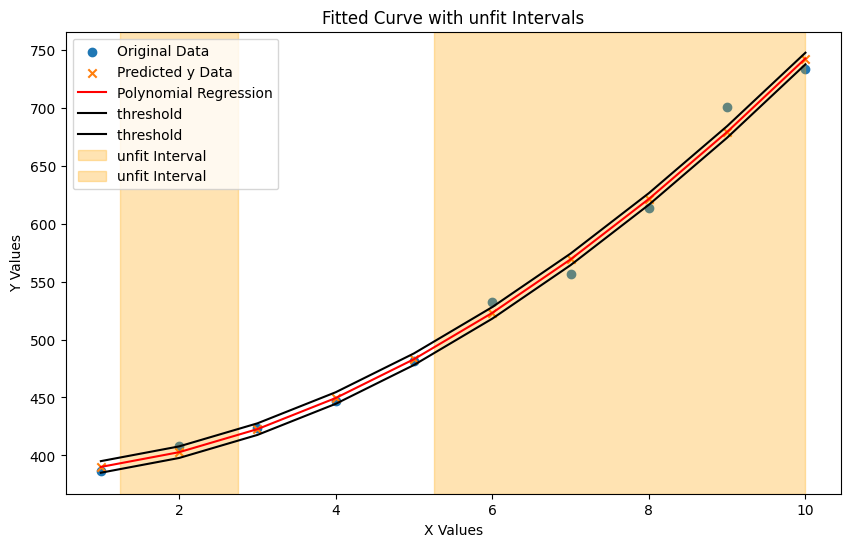

MAIN interval list from VAL: [[1.25, 2.75], [5.25, 10]]


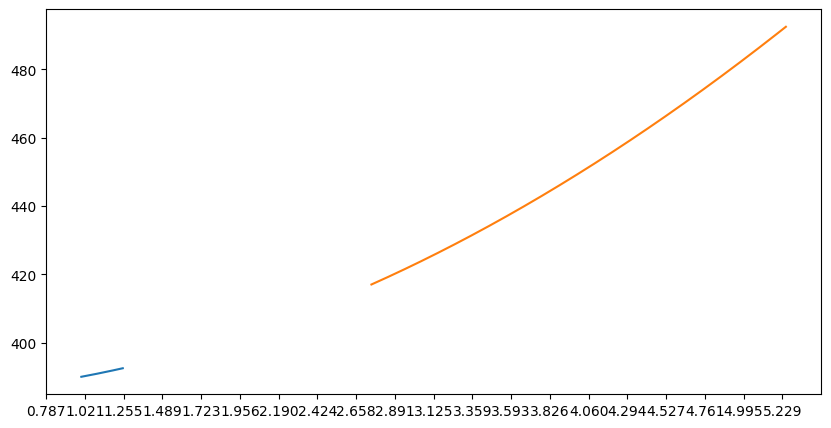

In [1]:
# IMPORT LIBRARIES
import numpy as np
import datetime

from components_configuration import components
from global_settings import simexSettings,mds

from validator_controller import ValidatorController
from modifier_controller import ModifierController
from simulator_controller import SimulatorController
from logger_utils import Logger

import pickle
import datetime
def save_object(obj, filename):
    with open(filename, 'wb') as outp:  # Overwrites any existing file.
        pickle.dump(obj, outp, pickle.HIGHEST_PROTOCOL)
        

validator_controller_novsl = ValidatorController()
logger = Logger()
logger_main_arguments = {}
is_main_func = True

# SUMO vsl
from controller_modifier_scenarios import Controller

# SUMO vsl generate modifiers [[1,[2900,...2900],[2,[3000,...3000]....]
modlist = Controller.get_list_of_modifiers(10)
# print(f"Mod list: {modlist}")
# mod_x_list = modlist

# Calls Simulator
# Input: list of ids and modifiers [[1,[2900,...2900],[2,[3000,...3000]....]
# Output: IDs,SIMULATED(values) [[1,388.88],[2,420.22]]
mod_xnv,sim_y_listnv = SimulatorController.simulator(modlist,selected_simulator=components['sumo_simulator_novsl'])
assert len(mod_xnv) == len(sim_y_listnv)

print("MAIN modx", mod_xnv)

# Calls Validator controller
intervals_list_novsl =  validator_controller_novsl.validate(mod_x_list=np.array(mod_xnv),sim_y_list=np.array(sim_y_listnv), selected_validator=components['validator'],global_interval=[1, 10])
print("MAIN interval list from VAL:", intervals_list_novsl)

filename1 = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
save_object(validator_controller_novsl,f"vc_novsl-{filename1}.pkl")

# MAIN cycle completed/interrupted -> write OVERALL statistics        
logger_main_arguments['log_contex'] = 'Overall Stats'                          
logger_main_arguments['main_status'] = 'end cycle'
logger.log_main(logger_main_arguments)